# SIR Function Model

In [5]:
%%file SIRwithODE45.m
%SIR with medicine and vaccines

function [t, y] = SIRwithODE45(S, I, R, beta, gamma, v, m)

y0 = [S I R];
tspan = [0 60];

% S is y(1), I is y(2)
[t, y] = ode45(@(t,y) [-(beta*y(1)*y(2)) - v*y(1); 
    beta*y(1)*y(2) - gamma*y(2) - m*y(2); 
    gamma*y(2) + v*y(1) + m*y(2)], tspan, y0);

Created file '/Users/navievurdien/Math370Project/SIRwithODE45.m'.


# Main Function

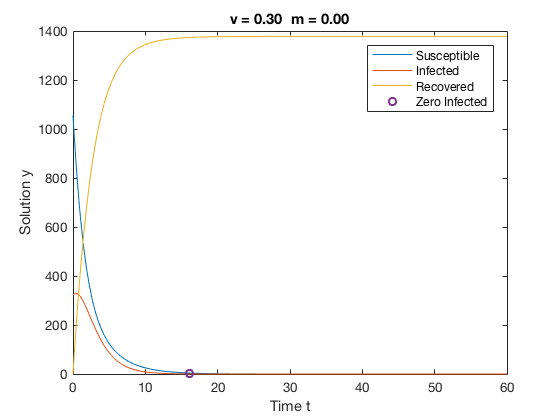

In [4]:
clear all

% Initial values and constants
% Real values for Liberia
S = 1056;
I = 322;
R = 0;
beta = 0.00058;
gamma = 0.5;

% Call helper function with ode45
v = 0.3;
m = 0.0;
[t,y] = SIRwithODE45(S, I, R, beta, gamma, v, m);

% Plot the solutions for y against t.
figure(1)
plot(t,y(:,1),'-',t,y(:,2),'-',t,y(:,3),'-')
title(sprintf('v = %.2f  m = %.2f', v, m));
xlabel('Time t');
ylabel('Solution y');

% Find when infected population becomes 0
zeroLoc = 1;
for i = 1:size(y,1)
    if y(i,2) < 0.5
        zeroLoc = i;
        break;
    end
end

hold on
plot(t(zeroLoc),y(zeroLoc,2), 'o')
legend('Susceptible','Infected','Recovered', 'Zero Infected')
hold off

# Fixed Point 1

# Fixed Point 2